In [1]:
#Importing Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading Data
df=pd.read_csv('Amazon_-_Movies_and_TV_Ratings[1].csv')

In [3]:
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


<AxesSubplot:ylabel='Frequency'>

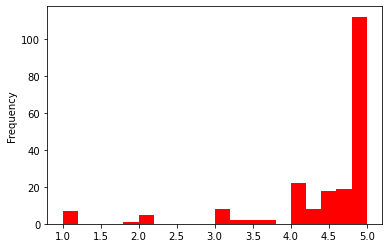

In [5]:
#ploting the mean frequency
df.describe().T['mean'].plot(bins=20, kind='hist', color = 'red')

<AxesSubplot:ylabel='Frequency'>

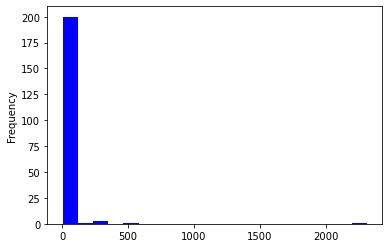

In [6]:
#ploting the count frequency
df.describe().T['count'].plot(bins=20, kind='hist', color = 'blue')

In [7]:
#Which movies have maximum views/ratings?
df.describe().T['count'].sort_values(ascending=False)[:1].to_frame()

,count
Movie127,2313.0


In [8]:
# What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
df.describe().T['mean'].sort_values(ascending=False).head(5).to_frame()

,mean
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0


In [9]:
#Define the top 5 movies with the least audience.
df.describe().T['count'].sort_values(ascending=True).head(5).to_frame()

,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


# User Based Model Buliding

In [10]:
df1 = df.melt(id_vars = df.columns[0],value_vars=df.columns[1:],var_name="Movies",value_name="Rating").fillna(0)
df1

,user_id,Movies,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,0.0
2,A3LKP6WPMP9UKX,Movie1,0.0
3,AVIY68KEPQ5ZD,Movie1,0.0
4,A1CV1WROP5KTTW,Movie1,0.0
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [17]:
from surprise import Reader
from surprise import accuracy
from surprise import Dataset
from surprise import SVD
from surprise.model_selection import train_test_split 

In [18]:
reader = Reader(rating_scale=(-1,10))

data = Dataset.load_from_df(df1.fillna(0), reader=reader)

In [19]:
trainset, testset = train_test_split(data, test_size=0.25)

In [20]:
algo=SVD()

In [21]:
algo.fit(trainset)

In [22]:
pred=algo.test(testset)

In [23]:
accuracy.rmse(pred)

RMSE: 0.2778


0.277784860239664

In [24]:
user_id = 'A1KLIKPUF5E88I'
muvi_id = 'Movie6'
r_ui = 5.0
algo.predict(user_id, muvi_id, r_ui=r_ui, verbose=True)

user: A1KLIKPUF5E88I item: Movie6     r_ui = 5.00   est = -0.02   {'was_impossible': False}


Prediction(uid='A1KLIKPUF5E88I', iid='Movie6', r_ui=5.0, est=-0.020443586038344834, details={'was_impossible': False})

In [25]:
from surprise.model_selection import cross_validate

In [26]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2806  0.2839  0.2816  0.2820  0.0014  
MAE (testset)     0.0424  0.0429  0.0429  0.0427  0.0002  
Fit time          35.73   36.18   36.20   36.04   0.22    
Test time         3.00    2.69    2.93    2.87    0.13    


{'test_rmse': array([0.28057446, 0.28394005, 0.28160419]),
 'test_mae': array([0.04239342, 0.04290084, 0.04290568]),
 'fit_time': (35.730185985565186, 36.181206703186035, 36.1992290019989),
 'test_time': (2.9958391189575195, 2.6885297298431396, 2.9268200397491455)}

In [27]:
def repeat(algo_type, frame, min_, max_):
    
    reader = Reader(rating_scale=(min_,max_))

    data = Dataset.load_from_df(frame, reader=reader)
    
    algo = algo_type
    
    print(cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True))
    
    print("#"*10)

    user_id = 'A3R5OBKS7OM2IR'
    muvi_id = 'Movie1'
    r_ui = 5.0
    print(algo.predict(user_id, muvi_id, r_ui=r_ui, verbose=True))
    
    print("#"*10)
    print()

In [29]:
df = df.iloc[:2500, :50]
df1 = df.melt(id_vars = df.columns[0], value_vars= df.columns[1:], var_name="movie_name", value_name="rating")

In [30]:
repeat(SVD(), df1.fillna(0), -1, 10)
repeat(SVD(), df1.fillna(df1.mean()), -1, 10)
repeat(SVD(), df1.fillna(df1.median()), -1, 10)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.3406  0.3474  0.3372  0.3417  0.0042  
MAE (testset)     0.0618  0.0630  0.0638  0.0629  0.0008  
Fit time          4.40    4.32    4.37    4.36    0.03    
Test time         0.23    0.25    0.50    0.33    0.12    
{'test_rmse': array([0.34062586, 0.3473958 , 0.33717196]), 'test_mae': array([0.06183103, 0.06301015, 0.06381149]), 'fit_time': (4.401604413986206, 4.322564601898193, 4.366919994354248), 'test_time': (0.23440098762512207, 0.2500274181365967, 0.5014522075653076)}
##########
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.14   {'was_impossible': False}
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.14   {'was_impossible': False}
##########

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0625  0.0613  0.0637  0.0625  0.0010  
MAE (testse

In [31]:
#trying grid search and find optimum hyperparameter value for n_factors
from surprise.model_selection import GridSearchCV

In [32]:
param_grid = {'n_epochs':[20,30],
             'lr_all':[0.005,0.001],
             'n_factors':[50,100]}

In [33]:
gs = GridSearchCV(SVD,param_grid,measures=['rmse','mae'],cv=3)
gs.fit(data)

In [35]:
gs.best_score

{'rmse': 0.2794318526744219, 'mae': 0.041415867570194755}

In [36]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.2794318526744219
{'n_epochs': 30, 'lr_all': 0.005, 'n_factors': 50}
